In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from random import seed
from scipy import stats
import seaborn as sns
import pingouin as pg
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV


Load data

In [69]:
# load data from pickle and convert to dataframe
brain_test = pd.read_pickle("3_brain_test.pkl")
brain_train = pd.read_pickle("3_brain_train.pkl")
main_test = pd.read_pickle("3_main_test.pkl")
main_train = pd.read_pickle("3_main_train.pkl")
brain_test = pd.DataFrame(brain_test)
brain_train = pd.DataFrame(brain_train)
main_test = pd.DataFrame(main_test)
main_train = pd.DataFrame(main_train)

In [70]:
main_test['Imaging site'] = main_test['Imaging site'].map({'Cheadle': '1', 'Reading': '2','Newcastle': '3', 'Bristol': '4'})
main_test["Smoking"].value_counts()

No                          7902
Yes, on most or all days     289
Only occasionally            163
Prefer not to answer           1
Name: Smoking, dtype: int64

Select with or without excluded subjects + splits

In [71]:
#main_test = main_test[main_test["Excluded"]==0]

#del main_test["BA Desikan Delta Corr"]

median_age = np.median(main_test["Age"])
main_test_young = main_test[main_test["Age"]<median_age]
main_test_old = main_test[main_test["Age"]>=median_age]

main_test_male = main_test[main_test["Gender"]=="Male"]
main_test_female = main_test[main_test["Gender"]=="Female"]

Show the data

In [72]:
main_test.head()

,Age,Gender,Total PA,Vigorous PA,Moderate PA,Light PA,BMI,ECG max workload,ECG max heart rate,SR Walking PA,...,Hand grip L,Hand grip R,Excluded,Imaging site,Smoking,Townsend deprivation,BA A2009 Delta Corr,BA ASEG Delta Corr,BA Desikan Delta Corr,BA Delta Corr
2,73.0,Female,2550.2400,10.0800,352.8000,2187.3600,26.9,NaN,NaN,1188.0,...,20.0,26.0,0,1,No,-3.469800,8.601317,11.342682,9.848702,2.426896
6,67.0,Male,1302.9120,0.0000,100.2240,1202.6880,34.2,NaN,NaN,330.0,...,42.0,36.0,1,1,No,-2.203830,-16.241672,2.635179,-14.563010,-6.317130
12,56.0,Male,1601.3088,18.9504,227.4048,1354.9536,28.4,120.0,117.0,396.0,...,35.0,39.0,1,1,No,0.642148,3.824066,-2.177301,3.801415,0.471986
21,56.0,Female,2465.2224,29.1168,427.0464,2009.0592,33.6,NaN,NaN,2970.0,...,18.0,18.0,1,1,No,-5.554810,-3.948342,-9.230483,14.603062,-6.657013
25,70.0,Female,2746.1376,10.0224,210.4704,2525.6448,22.1,NaN,NaN,2772.0,...,22.0,20.0,0,2,No,-0.812078,-10.480420,-15.018459,-1.414644,-12.166245


# Basic distributions

- Comparing training and test set based on
    - Gender
    - Age
    - Self-reported PA
    - ??
- Comparing excluded and included subjects based on
    - Gender
    - Age
    - PA
    - Brain Age Delta

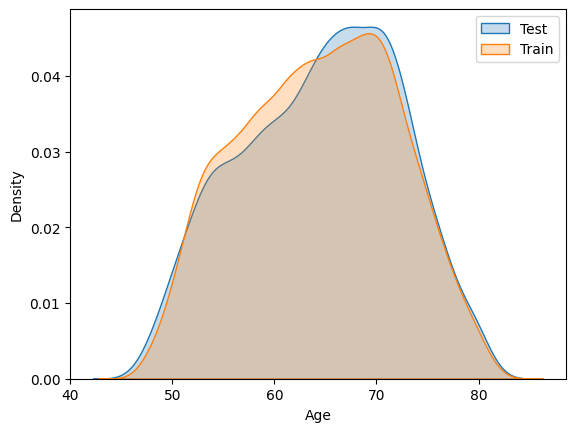

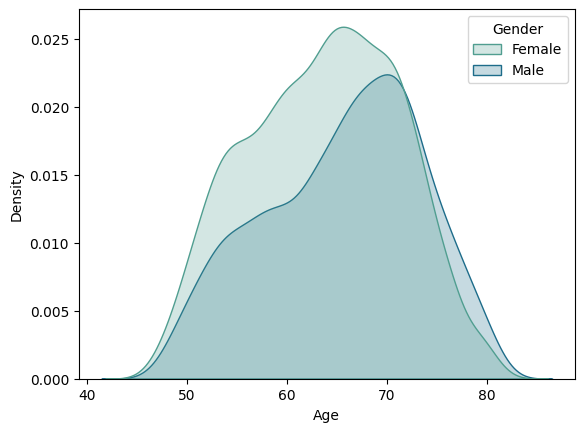

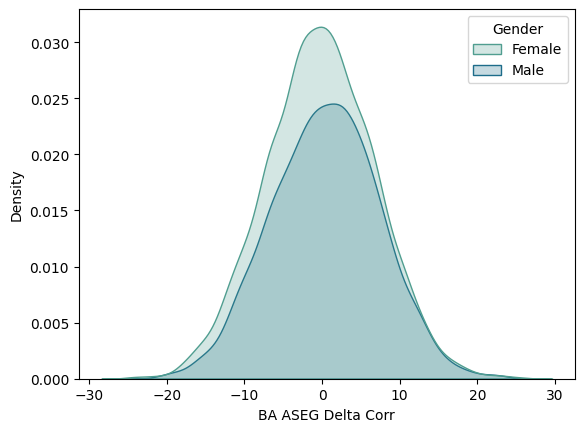

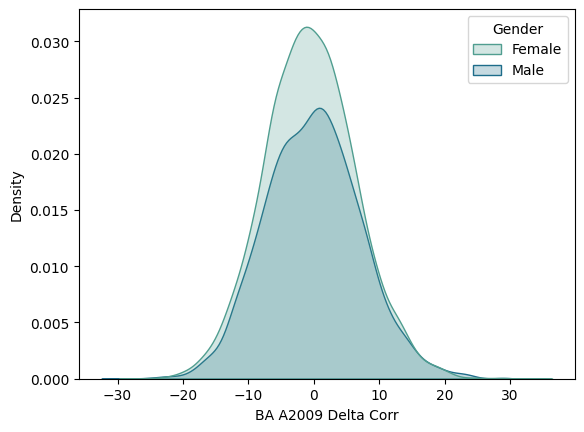

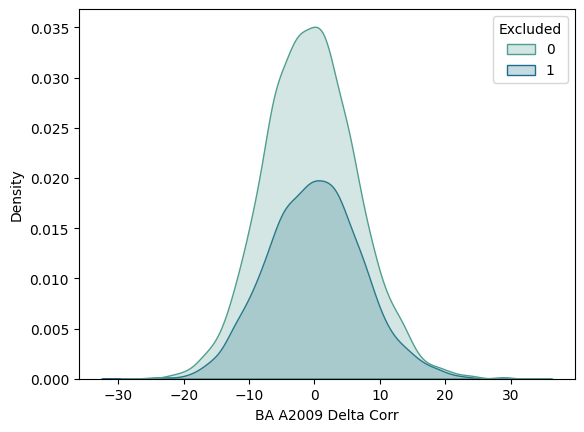

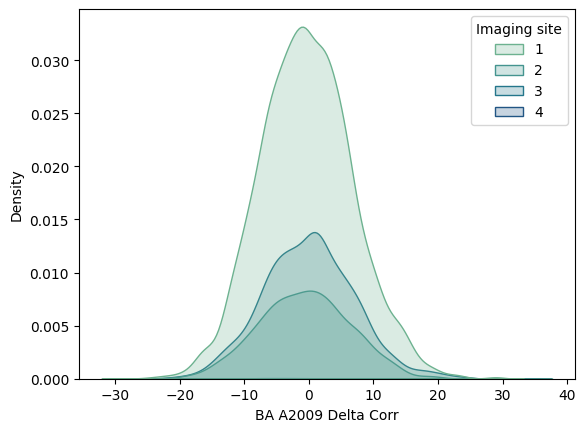

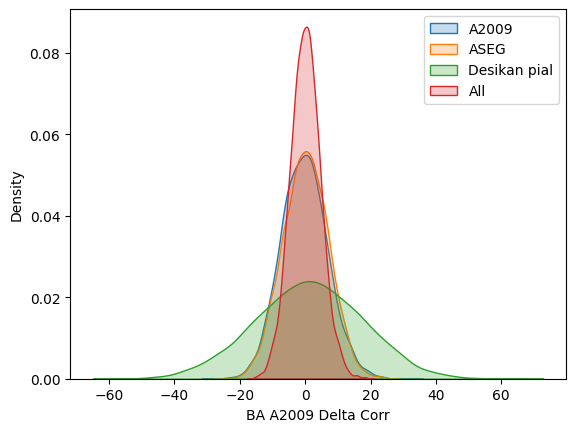

In [73]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Age', fill=True, label = "Test")
sns.kdeplot(data = main_train, x= 'Age', fill=True, label = "Train")
plt.legend()
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'Age', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Gender', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Excluded', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', hue = 'Imaging site', fill=True, palette = "crest")
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'BA A2009 Delta Corr', fill=True, label="A2009")
sns.kdeplot(data = main_test, x= 'BA ASEG Delta Corr', fill=True, label="ASEG")
sns.kdeplot(data = main_test, x= 'BA Desikan Delta Corr', fill=True, label="Desikan pial")
sns.kdeplot(data = main_test, x= 'BA Delta Corr', fill=True, label="All")
plt.legend()
plt.show()

Physical activity

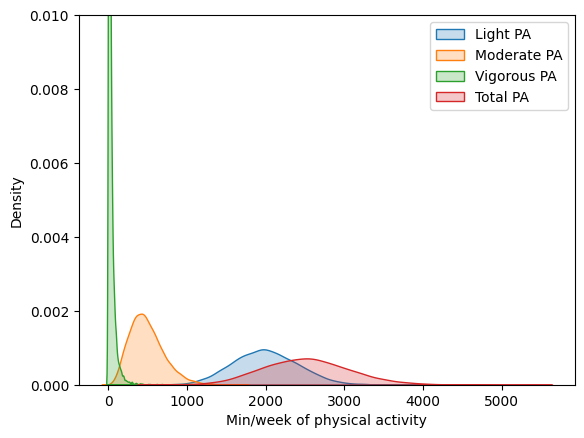

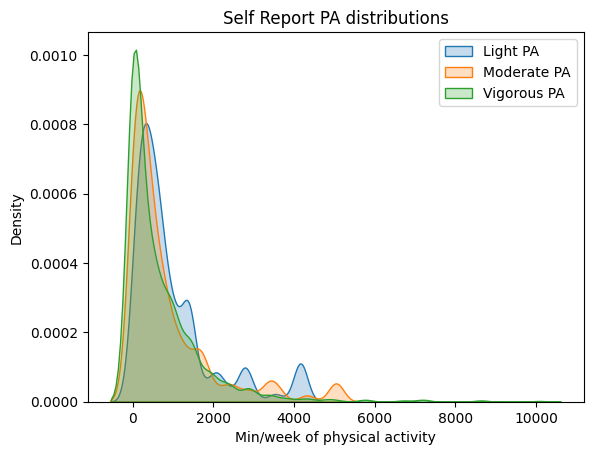

In [74]:
plt.figure()
sns.kdeplot(data = main_test, x= 'Light PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'Vigorous PA', fill=True, label = "Vigorous PA")
sns.kdeplot(data = main_test, x= 'Total PA', fill=True, label = "Total PA")
plt.xlabel("Min/week of physical activity")
plt.legend()
plt.ylim(0,0.01)
plt.show()

plt.figure()
sns.kdeplot(data = main_test, x= 'SR Walking PA', fill=True, label = "Light PA")
sns.kdeplot(data = main_test, x= 'SR Moderate PA', fill=True, label = "Moderate PA")
sns.kdeplot(data = main_test, x= 'SR Vigorous PA', fill=True, label = "Vigorous PA")
plt.xlabel("Min/week of physical activity")
plt.title("Self Report PA distributions")
plt.legend()
plt.show()

Scatterplots -> Association with BrainAge

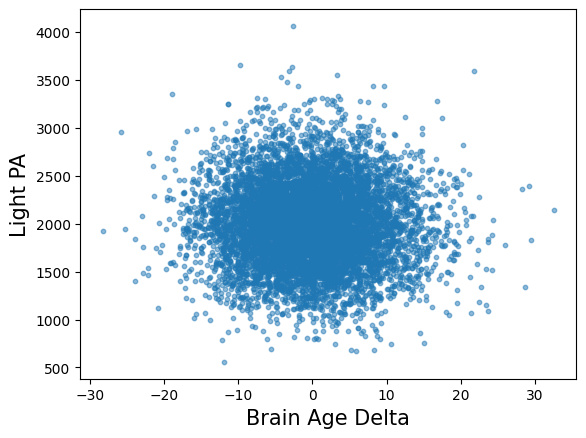

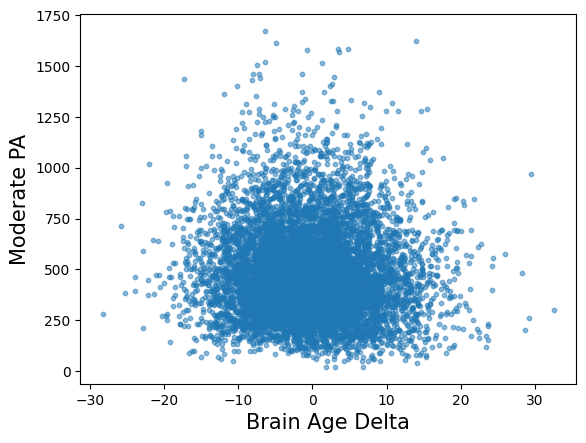

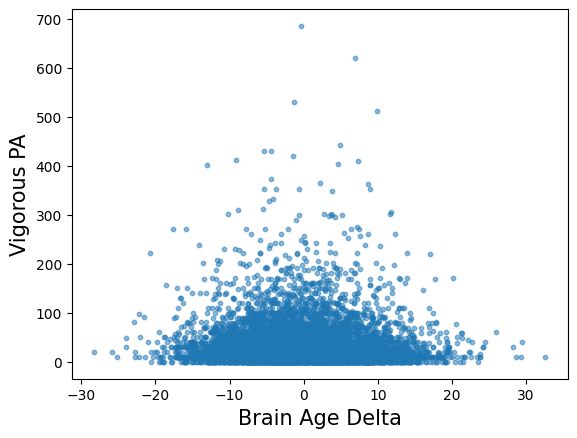

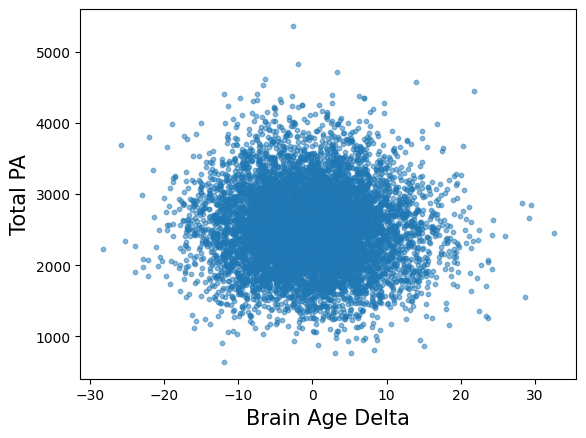

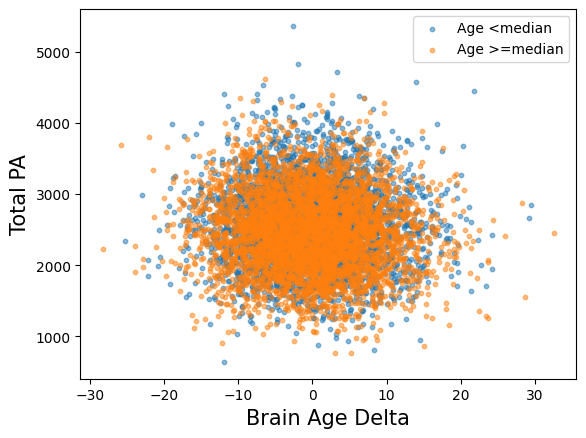

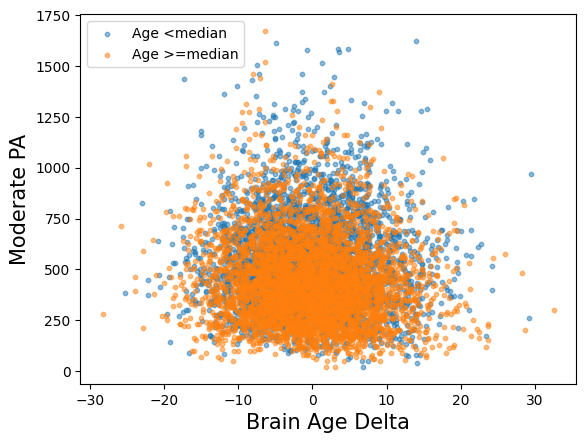

In [75]:
plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Light PA"], alpha=0.5, s=10)
plt.ylabel("Light PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Moderate PA"], alpha=0.5,s=10)
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Vigorous PA"], alpha=0.5, s=10)
plt.ylabel("Vigorous PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()

plt.figure()
plt.scatter(main_test["BA A2009 Delta Corr"], main_test["Total PA"], alpha=0.5, s=10)
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.show()



plt.figure()
plt.scatter(main_test_young["BA A2009 Delta Corr"], main_test_young["Total PA"], alpha=0.5, s=10, label="Age <median")
plt.scatter(main_test_old["BA A2009 Delta Corr"], main_test_old["Total PA"], alpha=0.5, s=10, label="Age >=median")
plt.ylabel("Total PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

plt.figure()
plt.scatter(main_test_young["BA A2009 Delta Corr"], main_test_young["Moderate PA"], alpha=0.5, s=10, label="Age <median")
plt.scatter(main_test_old["BA A2009 Delta Corr"], main_test_old["Moderate PA"], alpha=0.5, s=10, label="Age >=median")
plt.ylabel("Moderate PA", fontsize = 15)
plt.xlabel("Brain Age Delta", fontsize = 15)
plt.legend()
plt.show()

## Correlation Heatmap

<AxesSubplot:>

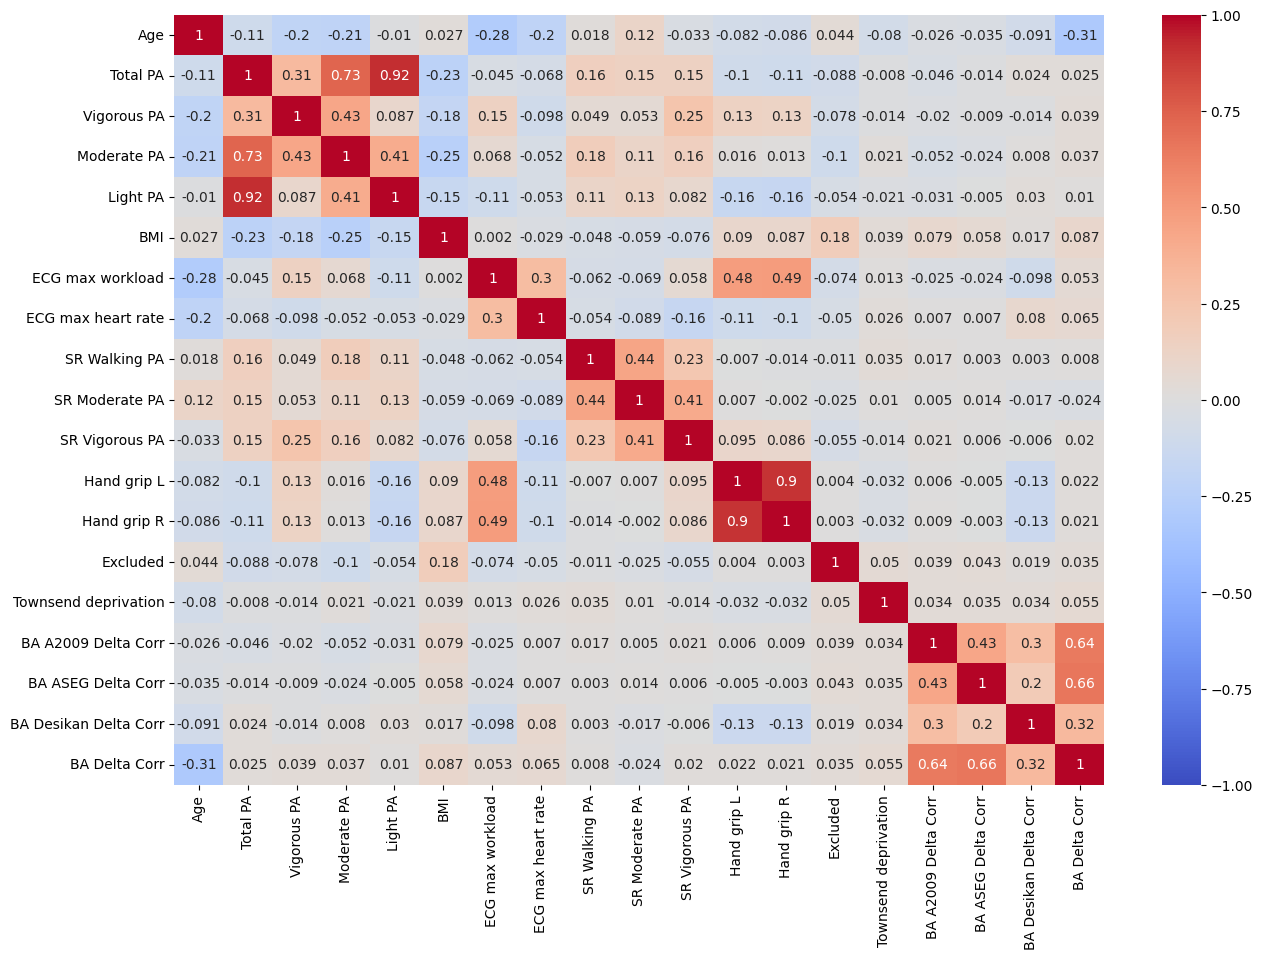

In [76]:
# heat map correlation matrix
# use pcorr to get partial correlations
corr = main_test.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)


<AxesSubplot:>

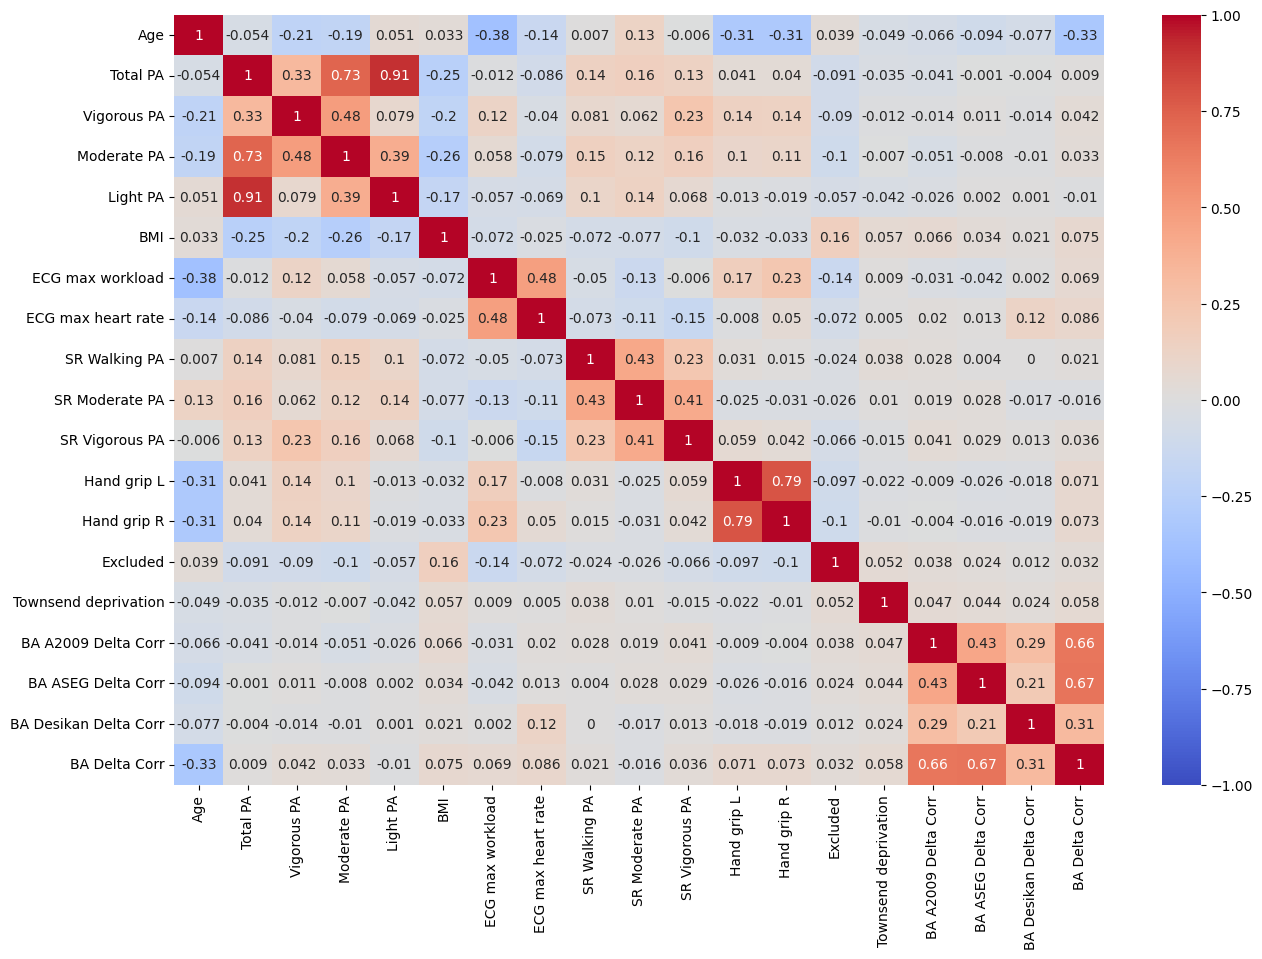

In [77]:
corr = main_test_female.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

<AxesSubplot:>

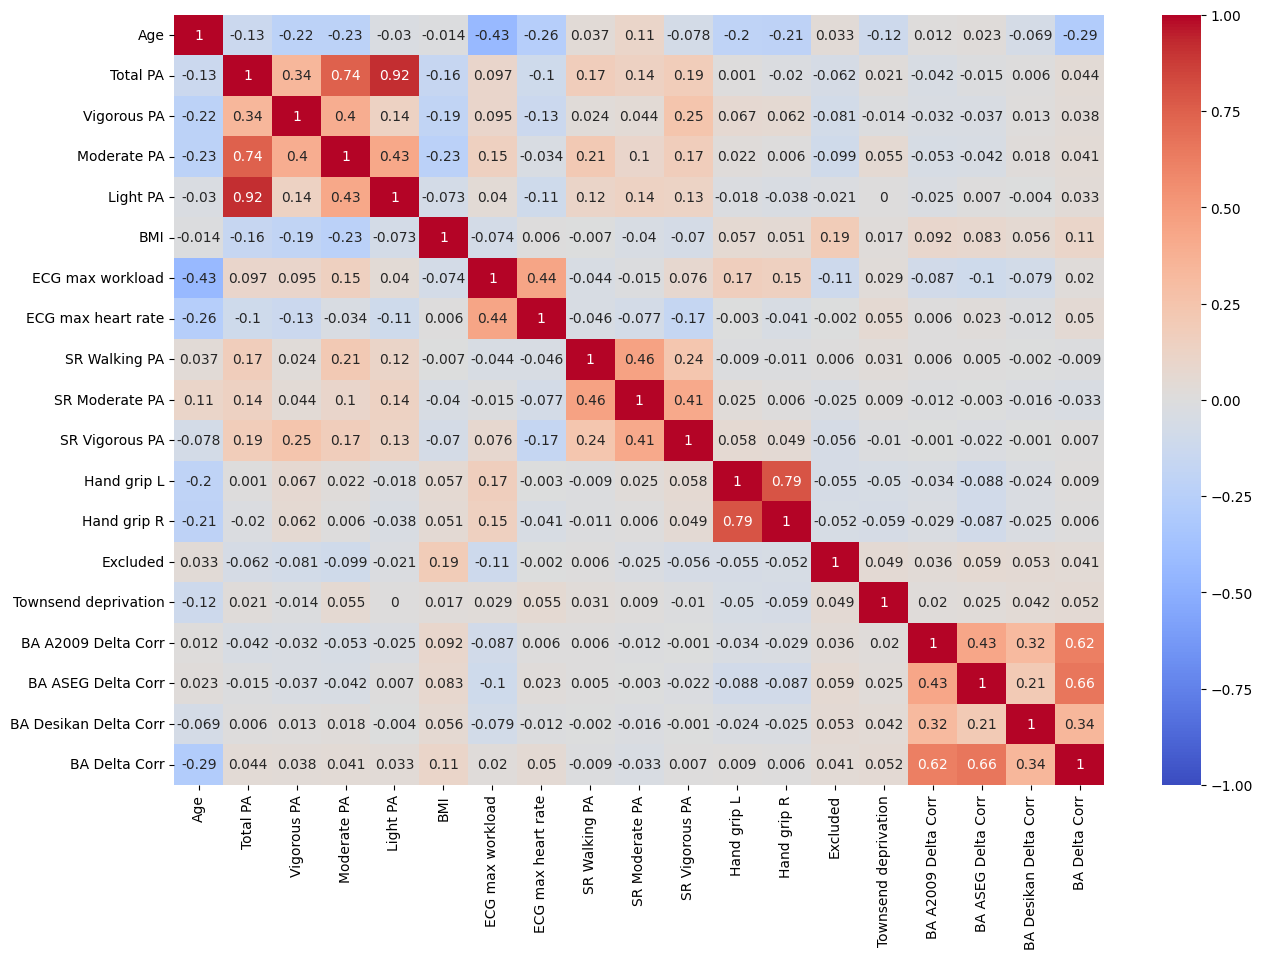

In [78]:
corr = main_test_male.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

<AxesSubplot:>

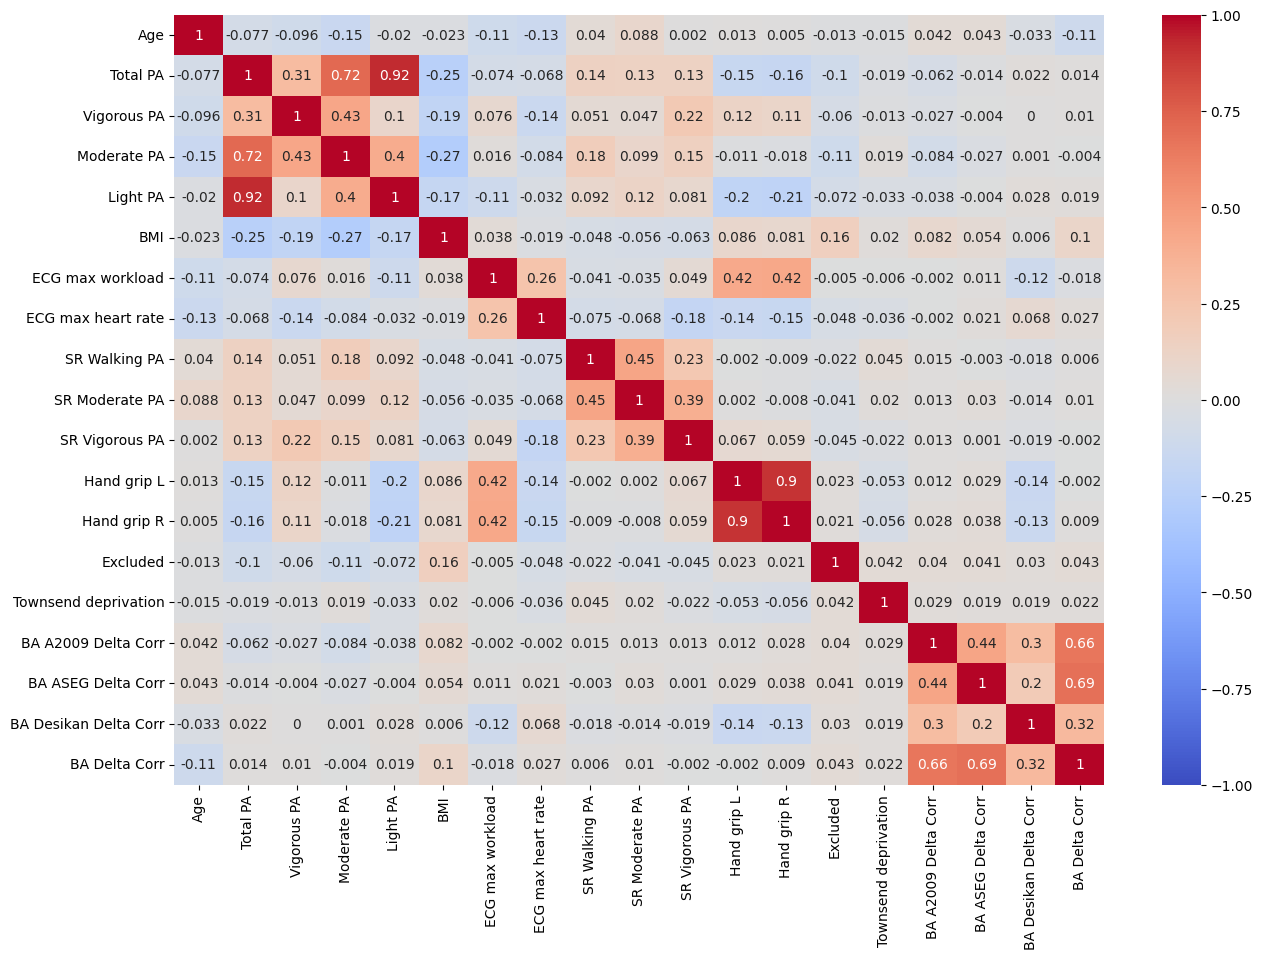

In [79]:
corr = main_test_old.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

<AxesSubplot:>

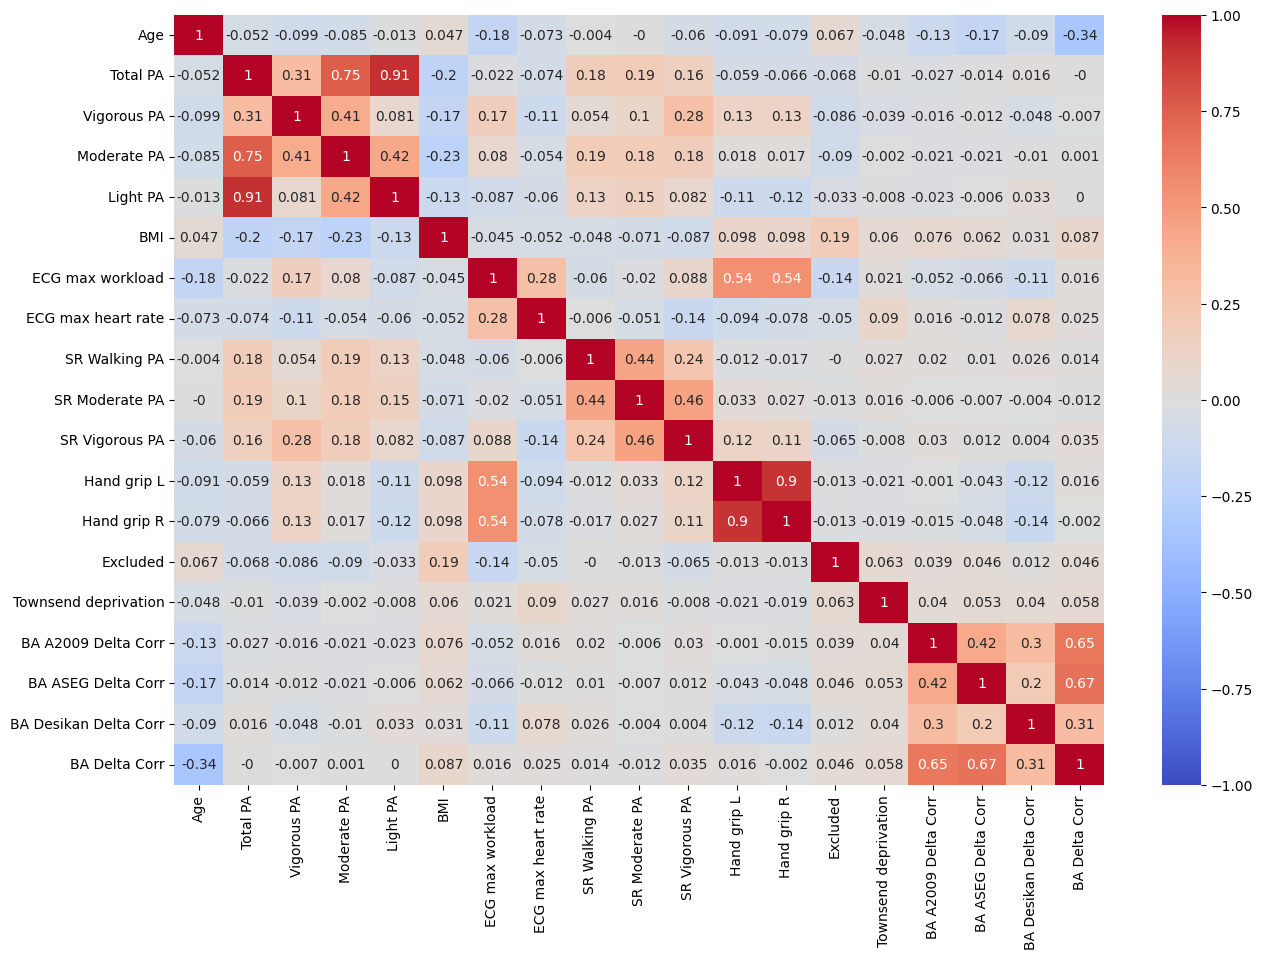

In [80]:
corr = main_test_young.corr()
corr = round(corr,3)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)

# Regression models

## Partial correlations

In [81]:
cov_correlation = pg.partial_corr(data=main_test, x='Vigorous PA', y='BA Delta Corr', covar='Age')
cov_correlation

,n,r,CI95%,p-val
pearson,8357,-0.023969,"[-0.05, -0.0]",0.028451


In [82]:
cov_correlation = pg.partial_corr(data=main_test_young, x='Vigorous PA', y='BA Delta Corr', covar='Age')
cov_correlation

,n,r,CI95%,p-val
pearson,3921,-0.044014,"[-0.08, -0.01]",0.005848


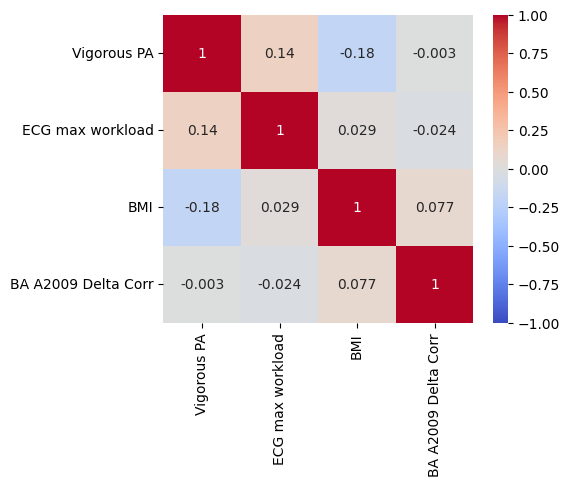

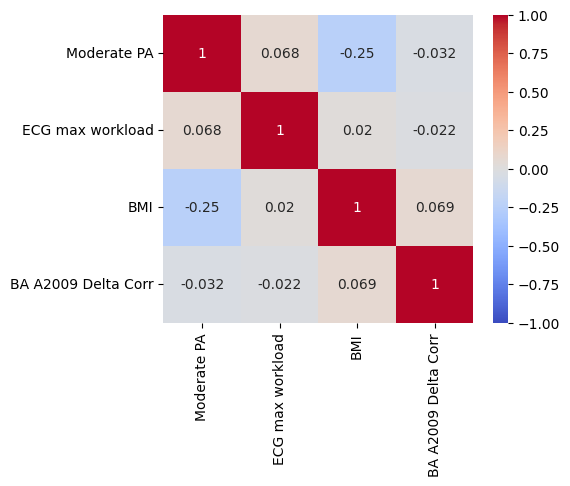

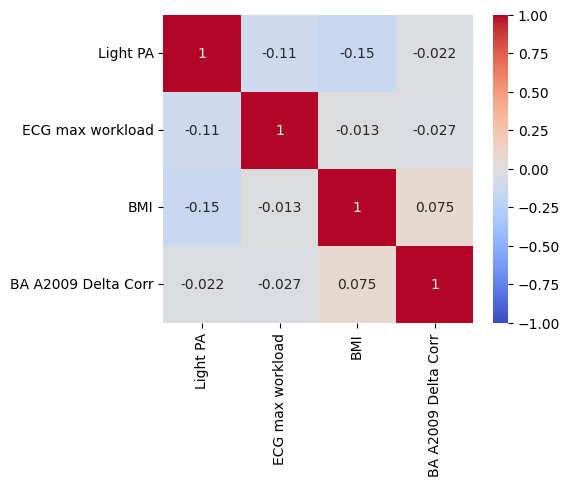

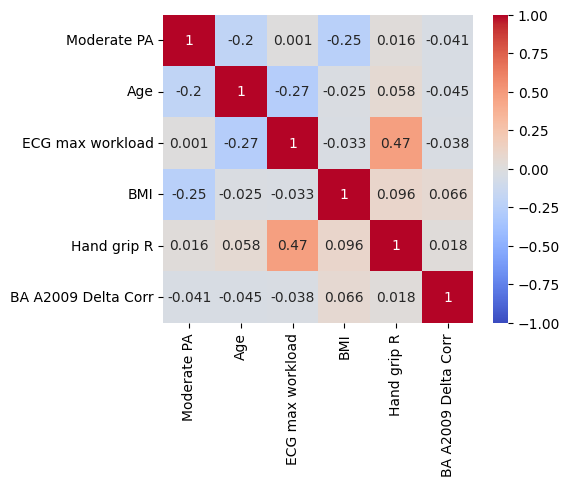

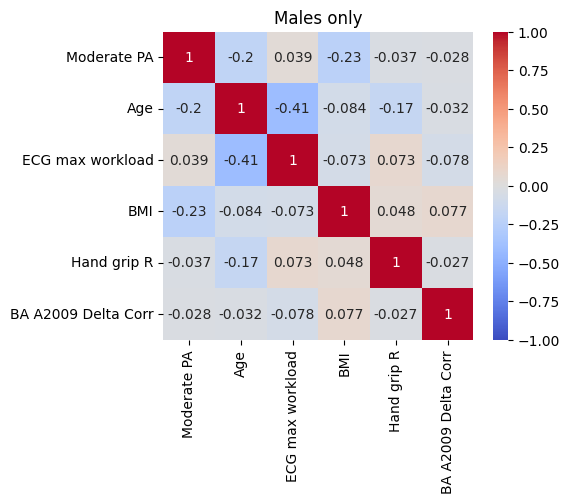

In [86]:

pcorr = main_test[["Vigorous PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Light PA", "ECG max workload", "BMI", "BA A2009 Delta Corr", "Imaging site"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

pcorr = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.show()

main_test_1 = main_test[main_test["Gender"]=="Male"]

pcorr = main_test_1[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr"]].pcorr()
pcorr = round(pcorr,3)
plt.figure(figsize=(5,4)) 
sns.heatmap(pcorr, annot=True, cmap = "coolwarm", vmin=-1, vmax=1)
plt.title("Males only")
plt.show()

## Multiple linear regression

In [84]:
x = main_test[["Vigorous PA", "Moderate PA", "Light PA","Imaging site"]]
y = main_test["BA A2009 Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.002861615519714311
intercept: 0.7418031263453214
coefficients: [ 0.         -0.001476   -0.00019392  0.        ]


In [85]:
dataset = main_test[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R", "BA A2009 Delta Corr", "Excluded"]]
dataset = dataset.dropna(axis=0)
x = dataset[["Moderate PA", "Age", "ECG max workload", "BMI", "Hand grip R","Excluded"]]
y = dataset["BA A2009 Delta Corr"]
model = LassoCV().fit(x, y)
r_sq = model.score(x, y)
print(f"R squared: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

R squared: 0.01758756790983307
intercept: -0.7007844606862716
coefficients: [-0.0019037  -0.04152594 -0.00879877  0.1531121   0.01330257  0.        ]
